# Assignment 01: Simple Perceptron Learning Method

Name: Kathiravan Natarajan

cwid: 50174332

Due: **Wednesday February 22, 2017**

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

# ensure visualizations appear inline inside of notebooks
# and set default figure size to 10x10 in (modify this to optimize for your display)
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 5.0) # 12 inches x 5 inches


# Task 1: Load dataset

Load data from dataset1 csv file, define X_nobias input numpy array and y output array.

You should find a file in your repository assignments directory named `dataset1.csv`.  This file is a comma
separated format.  The first line label the columns of the dataset, where the first 2 columns `x_1`, `x_2`
are inputs for a binary classification task, and the third column, `y` is the binary class, 0 for negative
classification and 1 for positive classification.

In the next cell, read in the data set from the `dataset1.csv` file.  There are several ways to perform this task,
for example one way is to use the `pandas` `read_csv()` function as we have done in the past in our lecture notebooks.

Once you have read in the file, split the data in regular NumPy arrays named `X_nobias` and `y`, where `X_nobias`
should be an 8x2 shaped array containing the `x_1` and `x_2` columns from the data set, and `y` will be a
numpy array of shape 8, (e.g. a vector of 8 items).  Make sure you convert these to regular NumpyArrays.  

If you read in the arrays correctly, you should end up with the following resulting data structures:

```python
>>> print X_nobias.shape
(8, 2)

>>> print type(X_nobias)
<type 'numpy.ndarray'>

>>> print X_nobias
[[-0.80857143  0.8372093 ]
 [ 0.35714286  0.85049834]
 [-0.75142857 -0.73089701]
 [-0.3         0.12624585]
 [ 0.87142857  0.62458472]
 [-0.02       -0.92358804]
 [ 0.36285714 -0.31893688]
 [ 0.88857143 -0.87043189]]
 
 >>> print y.shape
(8,)

>>> print type(y)
<type 'numpy.ndarray'>

>>> print y
[ 0.  0.  0.  0.  1.  1.  1.  1.]
```


In [5]:
# load in the dataset1.csv file here

data = pd.read_csv('dataset1.csv')


# split the data in X_nobias numpy array with the x_1 and x_2 input columns, and y numpy array of the output
# categories

X_nobias = data[['x_1','x_2']].as_matrix()
y = data['y'].as_matrix()
print X_nobias.shape
print type(X_nobias)
print X_nobias.shape
print y.shape
print type(y)
print y


(8L, 2L)
<type 'numpy.ndarray'>
(8L, 2L)
(8L,)
<type 'numpy.ndarray'>
[ 0.  0.  0.  0.  1.  1.  1.  1.]


# Task 2: Add Bias Column to Inputs

Write a function that takes a numpy array of shape m rows x n columns and returns
a new array of shape m+1 x n  and adds a column of 1's as the first column.

As a warm up, and to get some practice with writing Python functions and the `NumPy` library, write a simple
function that takes a mxn shaped numpy array and returns a new array with a 0th column of ones added which will
be suitable to be used as bias inputs for the perceptron learning.

Write your function in the following cell.  If you function is working correctly, you should be able to get
the following results from adding a bias column to the X array read in in task 1.

```python
>>> X = add_bias_column(X_nobias)
>>> print X.shape
(8, 3)
>>> print X
[[ 1.         -0.80857143  0.8372093 ]
 [ 1.          0.35714286  0.85049834]
 [ 1.         -0.75142857 -0.73089701]
 [ 1.         -0.3         0.12624585]
 [ 1.          0.87142857  0.62458472]
 [ 1.         -0.02       -0.92358804]
 [ 1.          0.36285714 -0.31893688]
 [ 1.          0.88857143 -0.87043189]]
```

In [6]:
def add_bias_column(X_nobias):
    """Add a 0th column of bias inputs to the array of X inputs.  Return a new
    array of inputs with this additional column of bias terms.
    
    Parameters
    ----------
    X_nobias - A m rows x n columns numpy array of inputs
    
    Returns
    -------
    X_bias - Returns a m+1 rows x n columns numpy array of inputs where the 0th column
        X_bias[:,0] is a column of 1 values, and columns [1:] are the original inputs from
        the X_nobias array columns [0:]
    """
    # implement your solution here
    X_ones = np.array(np.ones(8))
    X_bias = np.column_stack([X_ones,X_nobias]) 
    #np.concatenate([np.array(x)[:,None],np.array(y)],axis=1)
    # X_bias = np.concatenate([X_ones[:,0],X_nobias]) need to work more on this 
    return X_bias # return the new X_bias array you create

X = add_bias_column(X_nobias)
print X.shape
print X

(8L, 3L)
[[ 1.         -0.80857143  0.8372093 ]
 [ 1.          0.35714286  0.85049834]
 [ 1.         -0.75142857 -0.73089701]
 [ 1.         -0.3         0.12624585]
 [ 1.          0.87142857  0.62458472]
 [ 1.         -0.02       -0.92358804]
 [ 1.          0.36285714 -0.31893688]
 [ 1.          0.88857143 -0.87043189]]


# Task 3: Split Inputs by Category

Create another helper function to split the inputs up by the category.  

In this assignment we are performing a binary
classification task.  The `y` array has the correct categories.  To help us later on it will be useful to be able
to split the inputs up into those inputs for the positive category (where `y` output = 1) and the negative
category (where `y` output = 0).  

**Hint**: You certainly can do this task using explicit loops (and feel free to do it that way)  but the
task is realatively simple using NumPy fancy indexing (e.g. think of the values in `y` as an index that select
the particular inputs in `X` when `y == 0` and when `y == 1`that you want).  If you are having problems using `numpy` vectorized operations here or in
the rest of the assignment, try first programming the answer using explicit loops.

In the following cell implement the given function named `split_inputs_by_category()`.  This function should
take an input array X and a correct category output array y of corresponding outputs.  This function returns
2 separate and new input arrays, `X_neg` and `X_pos` containing only the negative inputs and positive inputs
respectively.

**Hint 2**: You can return multiple values from a python function by simply return a list or tuple of
the values.  For example, if you have 2 result variables names `result1` and `result2` you can return them both
from a python function using a single return statement

```python
    return result1, result2
```

If you implement the function correctly, you should get the following results when using it:

```python
>>> X_neg, X_pos = split_inputs_by_category(X, y)
>>> print X_neg
[[ 1.         -0.80857143  0.8372093 ]
 [ 1.          0.35714286  0.85049834]
 [ 1.         -0.75142857 -0.73089701]
 [ 1.         -0.3         0.12624585]]
>>> print X_pos
[[ 1.          0.87142857  0.62458472]
 [ 1.         -0.02       -0.92358804]
 [ 1.          0.36285714 -0.31893688]
 [ 1.          0.88857143 -0.87043189]]
```

In [37]:
def split_inputs_by_category(X, y):
    """This function splits up the X input array into 2 arrays.  All rows in X that are
    in the negative category are returned as X_neg, and all input rows that are in the
    positive category are returned as X_pos.  The categories are indicated by the y vector
    that should be a vector of the same size as the number of rows/inputs in the X array.
    
    Parameters
    ----------
    X - A m rows of inputs by n columns numpy array.
    y - A (m,) shaped numpy vector of binary categorical outputs
    
    Returns
    -------
    X_neg, X_pos - Returns numpy arrays of only those input rows where y==0 in X (X_neg)   
       and where y==1 in X (X_pos)
    """
    # Implement you solution here
    '''
    X_pos = np.array([np.array([X[i]  for i in range(8)])[y[:8].astype('bool')]])
    y_n = np.logical_not(y)
    X_neg = np.array([np.array([X[i]  for i in range(8)])[y_n[:8]]])
    '''
    X_pos = np.array(X[np.where(y==1)])
    X_neg = np.array(X[np.where(y==0)])
    return X_neg, X_pos # example of returning a list or tuple of values

X_neg, X_pos = split_inputs_by_category(X, y)
print X_neg
print X_pos
print X_pos.shape
print y 

[[ 1.         -0.80857143  0.8372093 ]
 [ 1.          0.35714286  0.85049834]
 [ 1.         -0.75142857 -0.73089701]
 [ 1.         -0.3         0.12624585]]
[[ 1.          0.87142857  0.62458472]
 [ 1.         -0.02       -0.92358804]
 [ 1.          0.36285714 -0.31893688]
 [ 1.          0.88857143 -0.87043189]]
(4L, 3L)
[ 0.  0.  0.  0.  1.  1.  1.  1.]


# Task 4: Implement Perceptron Weighted Sum

A perceptron (as with all neural network units) simply starts out ising the weighted sum of its inputs, e.g.
multiply each input by its corresponding weight and sum this result up.  Write a function that takes a current
set of parameters $\theta$ (theta) and a set of inputs `X` (m rows of input by n columns) and returns the weighted sum for each input

**Hint** Again you can do this as an explcit loop, but there is also a simple `numpy` vectorzied way of calculating
the weighted sum in a single operation.

**Hint 2** If you used `numpy` vectorized operations you might end up with a (mx1) shaped column vector.  However it is much easier in later functions to assume you simply have a (m,) shaped vector of the resulting weighted sum
of the inputs.  You can use the `x.flatten()` function on a number array to turn a (mx1) column vector back into a
(m,) shaped array.

If you implement the function correctly, you should get the following results when using it:

```python
>>> theta = np.array([[ 0.77187205],
                      [-0.62170147],
                      [ 0.76091527],
                     ])

>>> s = calc_weighted_sum(theta, X)
>>> print s
[ 1.91160744  1.19699298  0.6828856   1.05444488  0.70535968  0.08153384
  0.30359929 -0.44287903]

>>> print s.shape
(8,)

```

In [19]:
def calc_weighted_sum(theta, X): 
    """This function returns the weighted sum for each input in X given the mode weight/parameters
    in theta.  X should be an m rows of inputs x n columns shaped matrix, and theta should be a 
    nx1 column matrix of parameter values.
    
    Parameters
    ----------
    theta - A n x 1 shaped column matrix of weight parameters.  If a bias term is being used, a bias
       column of 1's should be added to the X inputs before calling this function, but in any case if
       there are m inputs by n features in X, there need to be n theta parameters to calculate the 
       weighted sum.
    X - A m rows of input by n columns of features numpy array.  Each row represents a separate input.
       Each columns represents a feature of the input.  If we are representing a bias term in our models,
       a column of 1's for the bias term needs to be added to X before calling this function.
    
    Returns
    -------
    sum - Returns a (m,) shaped numpy vector of weighted sums, the result of applying the theta parameter
       model to each of the m inputs in X.
    """
    # Implement your solution here
    
    s = np.dot(X,theta).flatten()
    return s
  

theta = np.array([[ 0.77187205],
                  [-0.62170147],
                  [ 0.76091527],
                 ])

s = calc_weighted_sum(theta, X)
print s
print s.shape

[ 1.91160744  1.19699298  0.6828856   1.05444488  0.70535968  0.08153384
  0.30359929 -0.44287903]
(8L,)


# Task 5: Calculate Binary Threshold Output

A perceptron does a simple binary threshold on the weighted sum hypothesis.  Using the function
from previous task (`calc_weighted_sum`), calculate the perceptron output using a binary
threshold at 0 of the weighted sum values.

**Hint**: you can do this using a loop, but the np.where() function makes it easy to perform the binary
threshold for this task.

If you implement this function correctly, you should get the following results:

```python
>>> theta = np.array([[ 0.77187205],
                      [-0.62170147],
                      [ 0.76091527],
                     ])

>>> hypothesis = calc_perceptron_output(theta, X)
>>> print hypothesis
[ 1.  1.  1.  1.  1.  1.  1.  0.]

>>> print hypothesis.shape
(8,)
```

In [18]:
def calc_perceptron_output(theta, X):
    """Calculate the output of the preceptron unit given current weights in theta for all input
    values in X.  Use the weighted sum function from before to calculated the weighted sum of the
    parameters.  This function returns an array of binary categories 0/1 which is the hypothesized
    output for each input
    
    Parameters
    ----------
    theta - A n x 1 shaped column matrix of weight parameters.  If a bias term is being used, a bias
       column of 1's should be added to the X inputs before calling this function, but in any case if
       there are m inputs by n features in X, there need to be n theta parameters to calculate the 
       weighted sum.
    X - A m rows of input by n columns of features numpy array.  Each row represents a separate input.
       Each columns represents a feature of the input.  If we are representing a bias term in our models,
       a column of 1's for the bias term needs to be added to X before calling this function.
    
    Returns
    -------
    hypothesis - Returns a (m,) shaped numpy vector of binary categorical outputs, 0 for the negative
       category and 1 for the positive category.
    """
    # implement you solution here
    s = np.dot(X,theta)
    d = np.where(s >=0, 1.0, 0).flatten() 
    return d # return the calculated hypothesized categories as a (m,) shaped flattened vector


theta = np.array([[ 0.77187205],
                  [-0.62170147],
                  [ 0.76091527],
                 ])

hypothesis = calc_perceptron_output(theta, X)
print hypothesis
print hypothesis.shape

[ 1.  1.  1.  1.  1.  1.  1.  0.]
(8L,)


# Task 6: Split Input positive/negative and correct/incorrect

The previous functions will allow us to calculate the hypothesized output given the current
theta weight parameters of the perceptron.  A useful function to have for us to monitor the perceptron learning
is if we could have a function that takes the inputs `X`, calculates the proposed/hypothesised outputs `y_hypothesis`
and then determine which inputs we got correct and which we got incorrect.  For ease of use later on this function
will actually return 4 sets of results, the positive examples we got correct (`X_pos_correct`), the positive
examples we missed (`X_pos_incorrect`), and the correct and incorrect for the negative examples
(`X_neg_correct` and `X_neg_incorrect` respectively).  We will use our `calc_perceptron_output()` function to
calculated the hypothesized outputs, and the `split_inputs_by_category()` which will allow us to split by positive
and negative category and also by the correct and incorrect results using the hypothesized outputs.

**Hint** The `split_inputs_by_category` allows you to split the inputs on the correct outputs `y` assuming you
implemented it correctly.  But it should be equally able to split a set of inputs on a calculated `y_hypothesis`
just as easily.

If you implement this function correctly, you should get the following results:

```python
>>> X_neg_correct, X_neg_incorrect, X_pos_correct, X_pos_incorrect = calc_correct_incorrect_by_category(theta, X, y)
>>> print "Negative examples we got correct:\n", X_neg_correct
Negative examples we got correct:
[]

>>> print "\nNegative examples incorrect:\n", X_neg_incorrect
Negative examples incorrect:
[[ 1.         -0.80857143  0.8372093 ]
 [ 1.          0.35714286  0.85049834]
 [ 1.         -0.75142857 -0.73089701]
 [ 1.         -0.3         0.12624585]]

>>> print "\nPositive examples correct:\n", X_pos_correct
Positive examples correct:
[[ 1.          0.87142857  0.62458472]
 [ 1.         -0.02       -0.92358804]
 [ 1.          0.36285714 -0.31893688]]

>>> print "\nPositive examples incorrect:\n", X_pos_incorrect
Positive examples incorrect:
[[ 1.          0.88857143 -0.87043189]]

```

In [35]:
def calc_correct_incorrect_by_category(theta, X, y):
    """Given a set of theta weights for our perceptron and the inputs X plus the correct outputs y, split
    our data into 4 results and return X_neg_correct, X_neg_incorrect, X_pos_correct, X_pos_incorrect
    which are the input data that fell into each of the 4 logical possibilities for the current perceptron
    model.
    
    Parameters
    ----------
    theta - A n x 1 shaped column matrix of weight parameters.  If a bias term is being used, a bias
       column of 1's should be added to the X inputs before calling this function, but in any case if
       there are m inputs by n features in X, there need to be n theta parameters to calculate the 
       weighted sum.
    X - A m rows of input by n columns of features numpy array.  Each row represents a separate input.
       Each columns represents a feature of the input.  If we are representing a bias term in our models,
       a column of 1's for the bias term needs to be added to X before calling this function.
    y - A (m,) shaped vector of correct categories/outputs for the m inputs in X
    
    Returns
    -------
    X_neg_correct, X_neg_incorrect, X_pos_correct, X_pos_incorrect - Returns numpy arrays of the X inputs, split
       into the 4 logical posibilities of the inputs in the negative category that were correct and incorrect, and
       the inputs in the positive category that were correct and incorrect respectively.
    """
    # implement you solution here
    X_neg, X_pos = split_inputs_by_category(X, y)
    X_neg_correct,X_neg_incorrect = split_inputs_by_category(X_neg, hypothesis[:4])
    X_pos_incorrect,X_pos_correct = split_inputs_by_category(X_pos, hypothesis[4:])
    
    return X_neg_correct, X_neg_incorrect, X_pos_correct, X_pos_incorrect # make sure you return the 4 separated results


X_neg_correct, X_neg_incorrect, X_pos_correct, X_pos_incorrect = calc_correct_incorrect_by_category(theta, X, y)
print "Negative examples we got correct:\n", X_neg_correct
print "\nNegative examples incorrect:\n", X_neg_incorrect
print "\nPositive examples correct:\n", X_pos_correct
print "\nPositive examples incorrect:\n", X_pos_incorrect

Negative examples we got correct:
[]

Negative examples incorrect:
[[ 1.         -0.80857143  0.8372093 ]
 [ 1.          0.35714286  0.85049834]
 [ 1.         -0.75142857 -0.73089701]
 [ 1.         -0.3         0.12624585]]

Positive examples correct:
[[ 1.          0.87142857  0.62458472]
 [ 1.         -0.02       -0.92358804]
 [ 1.          0.36285714 -0.31893688]]

Positive examples incorrect:
[[ 1.          0.88857143 -0.87043189]]


# Task 7: Calculate Decision Boundary

One more small task.  For this problem with two input features and a bias feature term, a set of 3
weights or theta parameters represents the equation of a line that will define the decision boundary being made
by our perceptron unit.  The equation of the line is given by:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2  x_2
$$

The decision boundary occurs where $y = 0$.  Setting the above equation to 0 and solving for either of the
inputs will give us an equation that allows us to determine the decision boundary line.  For example, solving for
$x_2$:

$$
x_2 = \frac{\theta_0 + \theta_1 x_1}{- \theta_2}
$$

This equation allows us to easily determine points on the decision boundary line for any given set of 
theta parameter weights $\theta_0, \theta_1, \theta_2$.

Write a helper function that takes an array of theta parameters, and an array of $x_1$ values and calculates
the corresponding $x_2$ values for each $x_1$ defining the decision boundary.

If you implement this function correctly, you should get the following results:

```python
>>> x_1 = np.array([-1.0, 1.0])

>>> x_2 = calc_decision_boundary_points(theta, x_1)

>>> print x_1
[-1.  1.]

>>> print x_2
[ 1.79125121 -0.18035865]

```

[ 0.77187205]
[-1.83144376] [-0.19735519]
[-1.  1.]
[-1.83144376 -0.19735519]


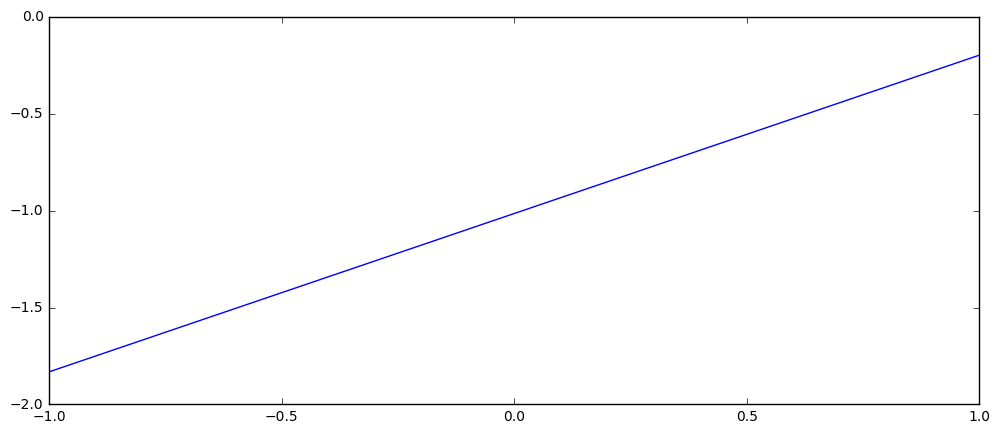

In [50]:
def calc_decision_boundary_points(theta, x_1):
    """Calculate corresponding x_2 location for each point in x_1 on the decision boundary defined
    by the given set of theta parameters.  The theta parameters define a decision function of the form

    y = theta[0] + theta[1] * x_1 + theta[2] * x_2
    
    This function returns points x_2 that correspond to points in x_1 when y=0
    
    x_2 = (theta[0] + theta[1] * x_1[:]) / - theta[2]
    
    Parameters
    ----------
    theta - A n x 1 shaped column matrix of weight parameters.  If a bias term is being used, a bias
       column of 1's should be added to the X inputs before calling this function, but in any case if
       there are m inputs by n features in X, there need to be n theta parameters to calculate the 
       weighted sum.
     x_1 - A numpy array of x values to compute corresponding x_t values for the given set of theta parameters.
        NOTE: This function assumes only 2 features, unlike previous function which should work generally for 
        any number of n features.
        
    Returns
    -------
    x_2 - A numpy array the same size and shape as x_1 of the calculated second point on the decision boundary
        associated with each point in x_1
    
    """
    # implememnt your solution here
    print theta[0]
    print (theta[1]*x_1[0] + theta[0])/- theta[2] , (theta[1]*x_1[1] + theta[0])/ -theta[2]
    x_2 = (theta[0] + theta[1]*x_1)/ - theta[2]
    return x_2 # make sure you return a numpy array the same shape as the input array x_1

# for example, for the given set of theta we were using before, we can calculate pairs of points
# on the decision boundary for when x_1 = -1.0 and 1.0 like this
x_1 = np.array([-1.0, 1.0])
x_2 = calc_decision_boundary_points(theta, x_1)
print x_1
print x_2
plt.plot(x_1, x_2, 'b-')

# Visualizing Perceptron Learning

The following is a helper function that plots the current state of the perceptron learning.  It helps
us visualize the current decision boundary, how the perceptron is currently performing, and the history
of its learning.  This function will be used to test your implementation of the perceptron learning
method.  This function uses some of the functions you implemented above to produce outputs.  So if you 
implemented your function correctly above, you should be able to now run this cell and see the 8 data
points in the dataset1 color coded by category and correct/incorrect, and the decision boundary
indicated by theta.

If your functions are implemented correctly, you will see a single figure from running the following cell.
The left panel of the figure plots all of the inputs in the X input array.  The inputs are coded by shape
according to their class, squares for positive classification and circles (0's) for negative classification.
The inputs are further color coded by whether they were classified correctly by the indicated theta paramters,
red for incorrect and green for correct.  The blue line represents the decision boundary that the current 
theta parameters give for our parameter space.  The yellow line represents the decision boundary for
the given generously feasible vector.

**NOTE**: You shouldn't have to do anything here, but if your functions above are incorrect this function may not work.

** NOTE 2**: The theta_gen_feas represents a generously feasible (correct) solution.  We will talk about this
in class.

[ 0.77187205]
[-1.83144376] [-0.19735519]
[-0.69414749]
[-1.93251093] [ 1.40059151]
[8.0, 4.0, 2.2, 1.5, 1.0]


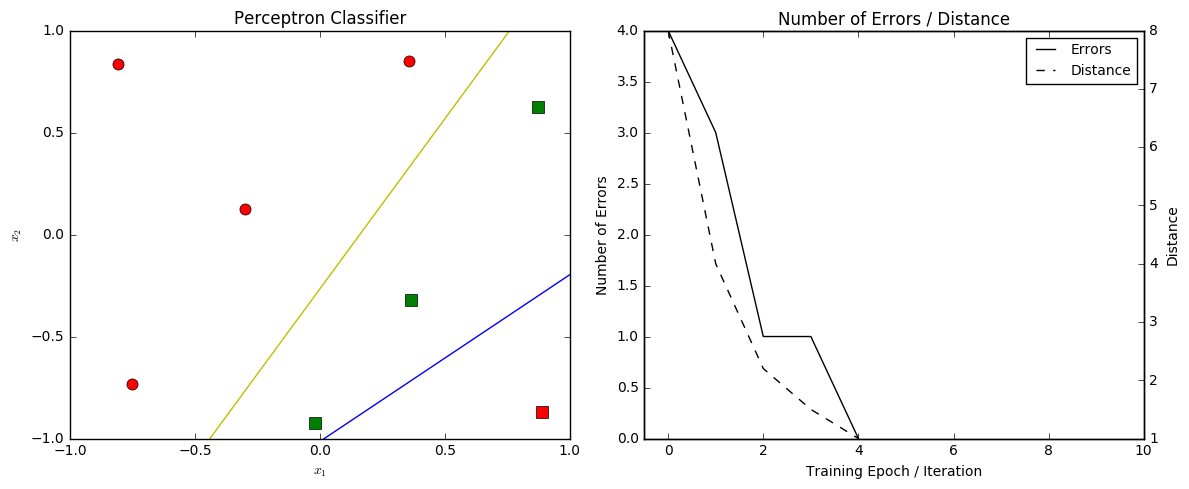

In [51]:
def visualize_perceptron_state(theta, theta_gen_feas, X, y, error_history, theta_distance_history):
    """We will visualize current state of perceptron learning given the set of inputs X and the current
    values of the theta weight parameters of the system theta.  We need to know the correct output categories
    y in order to visualize the correct/incorrect inputs
    
    Parameters
    ----------
    theta - A n x 1 shaped column matrix of weight parameters.  If a bias term is being used, a bias
       column of 1's should be added to the X inputs before calling this function, but in any case if
       there are m inputs by n features in X, there need to be n theta parameters to calculate the 
       weighted sum.
    theta_gen_feas - A generously feasible solution vector of theta parameters.  This should be the same
       shape as theta.  If provided, we plot the decision boundary specified by this generous solution.
    X - A m rows of input by n columns of features numpy array.  Each row represents a separate input.
       Each columns represents a feature of the input.  If we are representing a bias term in our models,
       a column of 1's for the bias term needs to be added to X before calling this function.
    y - A (m,) shaped vector of correct categories/outputs for the m inputs in X
    error_history - A normal numpy list, contains the history of the absolute number of miscategorized
       values for each epoch.  Must be provided and these values are plotted in the right panels showing
       the history of training over the training epochs.
    theta_distance_history - A normal numpy list, contains the history of the distances between the current
       value of the theta paramters to the generously feasible solution vector.  If provided, we plot the
       history of the distances on the second axis of the epochs/error-distance figure.
    """
    ## top left panel, plot all input points, use shape to indicate category circle=negative, square=positive
    # and use color to indicate result green=correct, red=incorrect.  Also indicate the location of the
    # decision boundary determined by the theta parameters
    plt.subplot(1, 2, 1)
    plt.title('Perceptron Classifier')
    plt.xlabel(u'$x_1$')
    plt.ylabel(u'$x_2$')
    X_neg_correct, X_neg_incorrect, X_pos_correct, X_pos_incorrect = calc_correct_incorrect_by_category(theta, X, y)
    plt.plot(X_neg_correct[:,1], X_neg_correct[:,2], 'go', markersize=8, label='Negative category (correct)')
    plt.plot(X_neg_incorrect[:,1], X_neg_incorrect[:,2], 'ro', markersize=8, label='Negative category (incorrect)')
    plt.plot(X_pos_correct[:,1], X_pos_correct[:,2], 'gs', markersize=8, label='Positive category (correct)')
    plt.plot(X_pos_incorrect[:,1], X_pos_incorrect[:,2], 'rs', markersize=8, label='Positive category (incorrect)')
    # now determine the decision boundary for two points of x_1 at -1.0 and 1.0
    x_1 = np.array([-1.0, 1.0])
    x_2 = calc_decision_boundary_points(theta, x_1)
    plt.plot(x_1, x_2, 'b-', label='decision boundary')
    # now determine decision boundry defined by the generously feasable vector
    if not theta_gen_feas is None:
        x_2 = calc_decision_boundary_points(theta_gen_feas, x_1)
        plt.plot(x_1, x_2, 'y-', label='generously feasable decision boundary')
    #plt.legend(loc='best', fontsize=6)
    plt.axis([-1, 1, -1, 1])
    
    ## top right panel, show history of number of errors classifier makes over the iterations of
    # learning for the perceptron classifier
    ax1 = plt.subplot(1,2,2)
    ax2 = ax1.twinx()
    ax1.set_title('Number of Errors / Distance')
    ax1.set_xlabel('Training Epoch / Iteration')
    ax1.set_ylabel('Number of Errors')
    epochs = len(error_history)
    p1, = ax1.plot(range(epochs), error_history, 'k-', label='Errors')
    if epochs < 10:
        ax1.set_xlim([-0.5, 10])
        
    ## top right, show distance of classifier training as second Y axis
    print theta_distance_history
    if len(theta_distance_history) != 0:
        ax2.set_ylabel('Distance')
        p2, = ax2.plot(range(epochs), theta_distance_history, 'k--', label='Distance')
        plt.legend([p1, p2], ['Errors', 'Distance'], loc='best', fontsize=10)
    
    plt.tight_layout()


theta = np.array([[ 0.77187205],
                  [-0.62170147],
                  [ 0.76091527],
                 ])
theta_gen_feas = np.array([[-0.69414749],
                           [ 4.3496526 ],
                           [-2.60997235],
                          ])
visualize_perceptron_state(theta, theta_gen_feas, X, y, [4, 3, 1, 1, 0], [8.0, 4.0, 2.2, 1.5, 1.0])

# Task 8: Perceptron Learning Rule

**Task 8**: Here you will actually implement the perceptron learning rule.  You have been given the function
and need to fill in the code at the indicated spots to implement learning.  This funciton iteratively updates
the theta parameter weights until it gets all of the input classifications correct.  This function makes use
of the previous function to visualize the results, and it is interactive so it pauses after each iteration to
display the results (hit any key to perform the next iteration).

First of all implement the `update_theta` learning rule for the perceptron we described in class.  Basically,
given the current set of theta parameters, this function should find all of the positive category inputs that 
were misclassified, and add the input row for each misclassified item to the theta parameters.  Then it
does the same with the misclassified negative category inputs, but it subtracts rather than adds the input
of each of these to the theta parameters.  The resulting set of new theta parameters that is calculated is
returned from this function.

If you implement this function correctly, you should get the following outputs when using it:

```python
>>> theta = np.array([[ 0.77187205],
                      [-0.62170147],
                      [ 0.76091527],
                     ])

>>> theta_next = update_theta(theta, X, y)
>>> print theta_next
[[-2.22812795]
 [ 1.7697271 ]
 [-1.1925731 ]]
```

In [ ]:
def update_theta(theta, X, y):
    """Implement perceptron learning rule.  This function returns a new set of theta weight parameters
    after updating weights based on incorrectly classified inputs
    """
    # make a copy of current theta weights, to retun as result
    theta_updated = np.copy(theta)
    
    # implement your solution here
    
    return theta_updated

In [ ]:
theta = np.array([[-0.62170147],
                  [ 0.76091527],
                  [ 0.77187205]])

theta_next = update_theta(theta, X, y)
print theta_next

**Perceptron Learning**: Once the update_theta function is working the following function should iteratively
run multiple epochs of training on the perceptron.  It will use your `update_theta()` and 
`calc_perceptron_output()` functions, which in turn your other smaller helper functions.  For dataset1, if you
have correctly implemented all you helper functions for the perceptron, you should get the following output
results when running with a given initial theta:

```python
>>> theta = np.array([[ 0.77187205],
                      [-0.62170147],
                      [ 0.76091527],
                     ])
>>> theta_gen_feas = np.array([[-0.69414749],
                               [ 4.3496526 ],
                               [-2.60997235],
                              ])

>>> learn_perceptron(theta, theta_gen_feas, X, y)
Epoch: 0  number incorrect: 5

     theta:  [[ 0.77187205]
 [-0.62170147]
 [ 0.76091527]]
 
Epoch: 1  number incorrect: 3

     theta:  [[-2.22812795]
 [ 1.7697271 ]
 [-1.1925731 ]]
 
Epoch: 2  number incorrect: 1

     theta:  [[ 0.77187205]
 [ 2.98401282]
 [-1.8105133 ]]
 
Epoch: 3  number incorrect: 0

     theta:  [[-0.22812795]
 [ 2.62686996]
 [-2.66101164]]
```

In [ ]:
from scipy.spatial.distance import euclidean
from scipy.linalg import norm

def learn_perceptron(theta, theta_gen_feas, X, y):
    """Learn the theta parameters for a perceptron for the given inputs X and correct binary categories
    Y.  This function assumes that a bias column/feature has already been added to the inputs X and
    that the size of theta matches the number of features with bias in the input.
    This function iterates until the classifier gets all inputs correct and returns the final
    set of theta weight parameters that achieve correct classification.
    """
    # bookeeping
    m, n = X.shape # m = number of inputs, n = number of 
    error_history = [] # used to keep track of errors made in each iteration
    theta_dist_history = [] # used to keep track of distance metric on theta weights in each iteration
    epoch = 0 # keep track of which epoch of training we are on
    
    # iterate while the classifier is still misclassifying some inputs
    while True:
        # calculate correct/incorrect classifications for this epoch
        y_hypothesis = calc_perceptron_output(theta, X)
        num_incorrect = np.sum(y != y_hypothesis)
        error_history.append(num_incorrect)
        
        # keep track of distance to generously feasible vector
        if not theta_gen_feas is None:
            dist = euclidean(theta, theta_gen_feas)
            #dist = norm(theta - theta_gen_feas)
            theta_dist_history.append(dist)
            
        # visualize current state of the classifier after this epoch
        print "Epoch: %d  number incorrect: %d\n" % (epoch, num_incorrect)
        print "     theta: ", theta
        fig = plt.figure(figsize=(12,6))
        visualize_perceptron_state(theta, theta_gen_feas, X, y, error_history, theta_dist_history)
        #key = raw_input('Press "Enter" to continue or "q" to quit...')
        #if key == 'q':
        #    break
        
        # update theta weight/parameters for this epoch
        theta = update_theta(theta, X, y)
        epoch += 1
        
        # stop iterating when we get all inputs correct or exceed some number of epochs of training
        if num_incorrect == 0 or epoch > 10:
            break


In [ ]:
theta = np.array([[ 0.77187205],
                  [-0.62170147],
                  [ 0.76091527],
                 ])
theta_gen_feas = np.array([[-0.69414749],
                           [ 4.3496526 ],
                           [-2.60997235],
                          ])

learn_perceptron(theta, theta_gen_feas, X, y)

# Further Tasks

Dataset 2 is not linearly separable.  To further test you functions, and see what happens to the perceptron
when the data cannot be separated by a line, try loading and running the perceptron learning with dataset 2.

In addition datasets 3 and 4 have also been provided with larger data sets.  Which of these data sets are linearly
separable?  Which ones are not?

In [ ]:
df = pd.read_csv('dataset2.csv')

X_nobias = df.ix[:,0:2].as_matrix()
y = df.y.as_matrix()
m,n = X_nobias.shape
X = add_bias_column(X_nobias)
print X
print y
print m
print n

In [ ]:
theta = np.array([[-0.54178883],
                  [ 1.84689887],
                  [-0.58324929],
                  ])
theta_gen_feas = None
learn_perceptron(theta, None, X, y)